In [1]:
import numpy as np
from scipy import signal
from matplotlib import pyplot as plt

#A4 tufte layout paper figure sizes
MARGIN_FIG = lambda scale: (1.99, 1.99*scale)
MAIN_FIG = lambda scale: (4.18, 4.18*scale)
FULL_FIG = lambda scale: (6.64, 6.64*scale)

#Fontsize configuration
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', family='Fira Code')
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


#Other matplotlib configuration
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.autolayout'] = True
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["savefig.bbox"] = 'tight'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Fira Code'
plt.rcParams['mathtext.it'] = 'Fira Code'
plt.ioff()

In [18]:
#to start with we'll use perseus distances
perseus = np.loadtxt('../tmp/SLICE_PERSEUS.csv', delimiter=',')
d = np.loadtxt('../tmp/distance_channels.csv', delimiter=',')
d2 = np.loadtxt('../tmp/distance_channels_2.csv', delimiter=',')

-0.13084972286220875


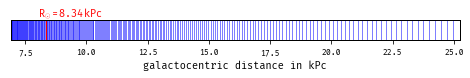

In [29]:
#we'll sample on a grid twice as fine as the distance between the two closest
#samples on the original grid to avoid aliasing (Nyquist)
dx = np.min((d - np.roll(d, -1))[:-1]) / 2
DX = np.max((d - np.roll(d, -1))[:-1]) / 2
print(dx)
offset = d[0] - dx

#The number of samples in our oversampled world is then equal to the total observed
#distance divided by dx
N = int((np.max(d) - np.min(d)) / dx)
d_oversamp = -dx*np.arange(N) + offset

plt.figure(figsize=FULL_FIG(0.18))
plt.xlim(d[0], d[-1])
plt.ylim(0,1)
plt.vlines(d, ymin=0, ymax=1, color='blue', linewidth=0.5)
plt.vlines(8.34, ymin=0, ymax=1, color='red')
plt.text(9.34, 1.15, '$R_{\odot}=8.34kPc$', color='r', horizontalalignment='center')
plt.yticks([])
plt.xlabel('galactocentric distance in kPc', fontsize=10)
plt.savefig('../figs/distance_axis.pdf', transparent=True, bbox_inches="tight", pad_inches=0)

def gauss(x, mu, sigma):
  norm = 1 / sigma*np.sqrt(2*np.pi)
  return np.exp(-(x-mu)**2 / (2*sigma**2)) / (sigma*np.sqrt(2*np.pi))

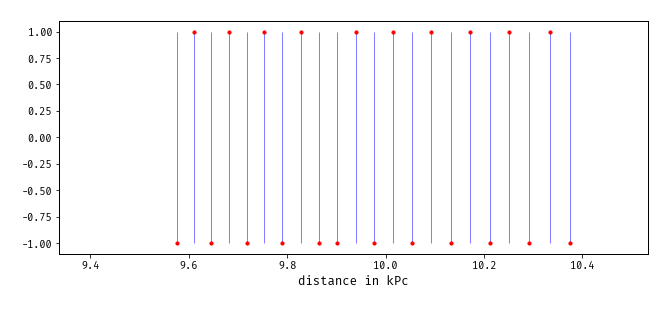

In [5]:
#test this with a sine
f = 10/(np.max(d) - np.min(d))
sig = lambda d: signal.square(2*np.pi*f*d)

plt.figure(figsize=(9, 4))
plt.xlim(d[0]*0.9, d[-1]*1.1)
plt.vlines(d, ymin=-1, ymax=1, color='blue', linewidth=0.5)
plt.xlabel('distance in kPc')
plt.scatter(d, sig(d), color='red', zorder=20, s=10)

/usr/lib/python3.11/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


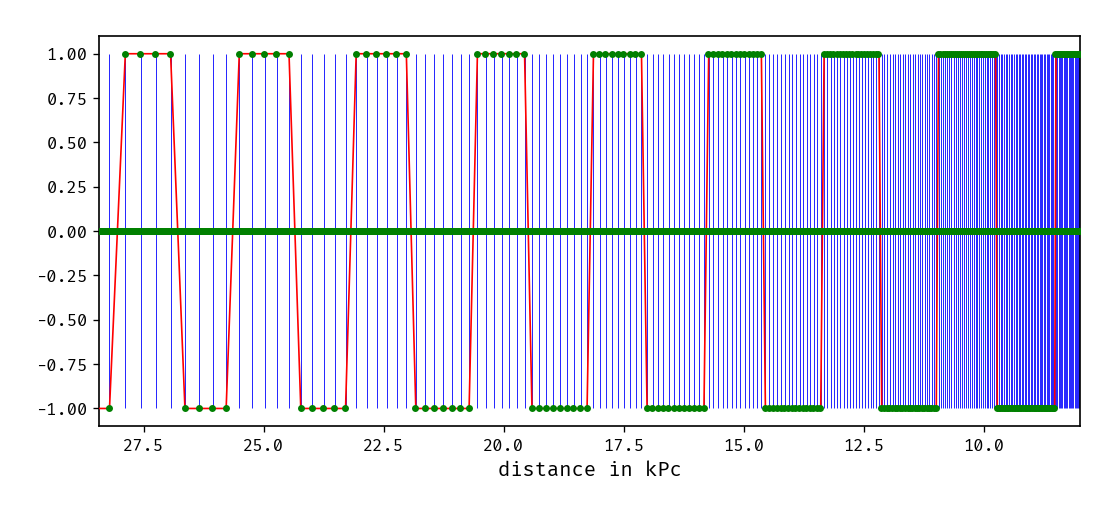

In [59]:
#sample the old signal on the new grid
old_sig_new_grid = np.zeros(len(d_oversamp))
for (point, distance) in zip(sig(d), d):
  idx = -int(np.round((distance - offset) / dx, 0)) -1
  old_sig_new_grid[idx] = point

plt.figure(figsize=(9, 4), dpi=120)
plt.xlim(d[0]*0.9, d[-1]*1.1)
plt.vlines(d, ymin=-1, ymax=1, color='blue', linewidth=0.5)
plt.xlabel('distance in kPc')
plt.plot(d, sig(d), color='red', zorder=20)
plt.scatter(d_oversamp, old_sig_new_grid, color='green', zorder=20, s=10)

/usr/lib/python3.11/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


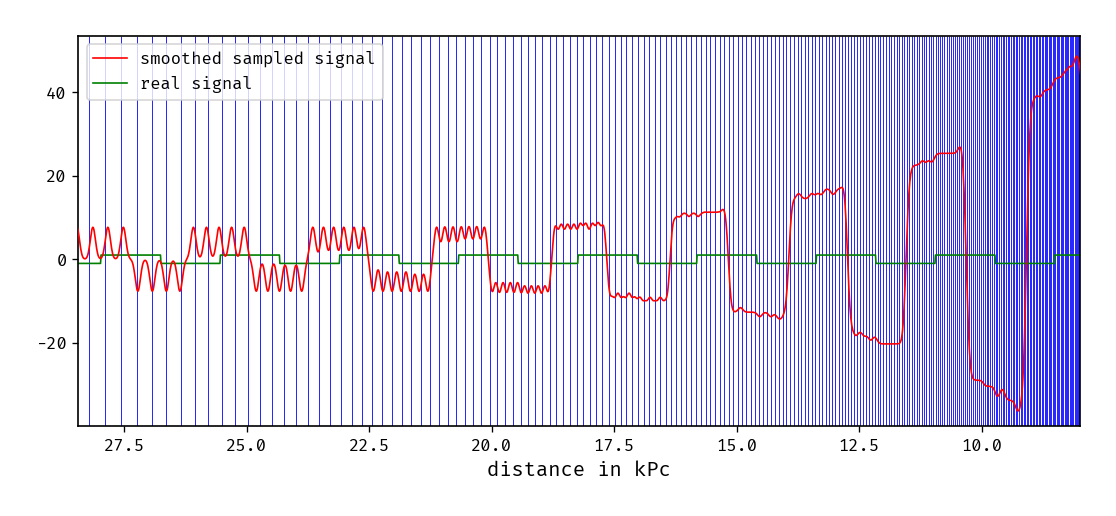

In [60]:
#now we convolve the sine with a gaussian to get the sample smoothed to the same
#sampling scale over the entire range!
conv = gauss(d_oversamp, 20, DX/4)
new_sig = np.convolve(old_sig_new_grid, conv, mode='same')

plt.figure(figsize=(9, 4), dpi=120)
plt.xlim(d[0]*0.9, d[-1]*1.1)
plt.vlines(d, ymin=np.min(new_sig)*1.1, ymax=np.max(new_sig)*1.1, linewidth=0.5, color='blue')
plt.xlabel('distance in kPc')
plt.plot(d_oversamp, new_sig, color='red', zorder=20, label='smoothed sampled signal')
plt.plot(d_oversamp, sig(d_oversamp), label='real signal', color='green')
plt.ylim(np.min(new_sig)*1.1, np.max(new_sig)*1.1)
plt.legend()

/tmp/ipykernel_10402/2123146940.py:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig('./sampling_example/pure_signal.png', bbox_inches='tight')
/tmp/ipykernel_10402/2123146940.py:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig('./sampling_example/smoothing_kernel.png', bbox_inches='tight')
/tmp/ipykernel_10402/2123146940.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig('./sampling_example/funky_signals.png', bbox_inches='tight')
/tmp/ipykernel_10402/2123146940.py:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig('./sampling_example/unsmoothed_signal.png', bbox_inches='tight')
/usr/lib/python3.11/site-packages/IPython/core/pylabtools.py:151: UserWarning: This fig

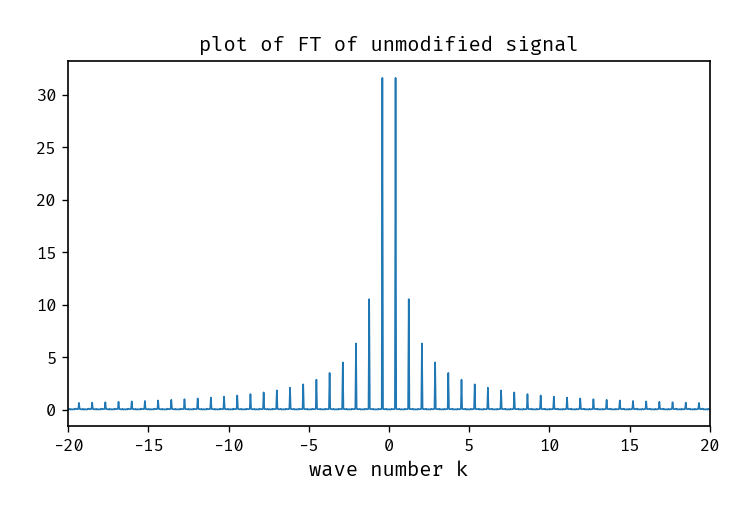

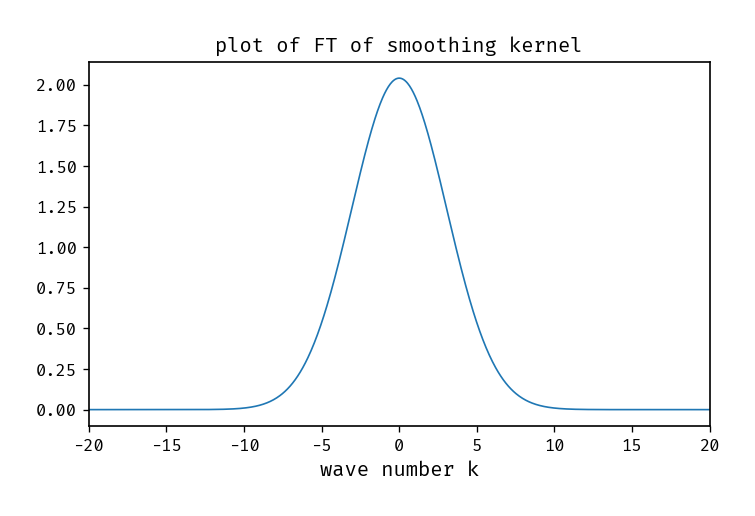

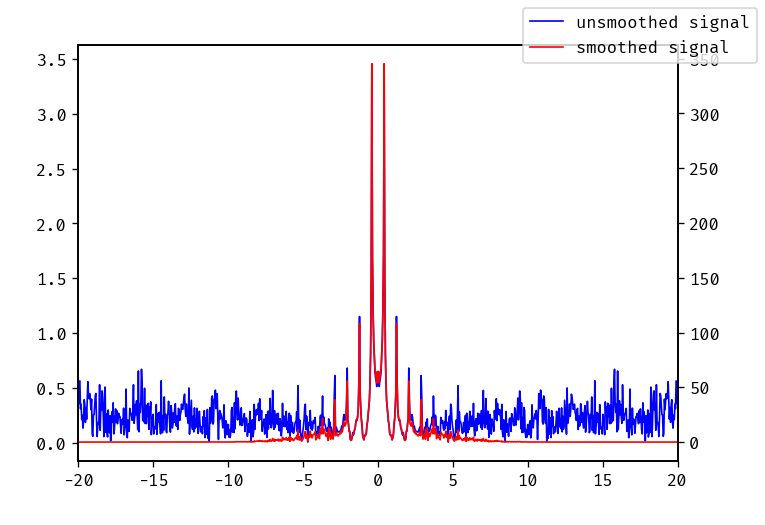

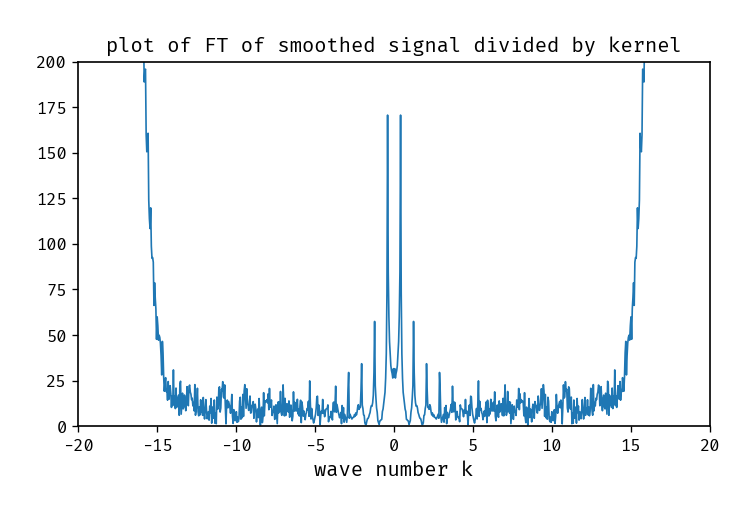

In [58]:
#let's try using FiNFFT
freqs = np.array(sorted(np.fft.fftfreq(N, dx)))
#k = nfft.nufft1d3(d, sig.astype(np.complex128), freq, eps=1e-15)

#Let's do the deconvolution manually
conv_hat = np.fft.fft(conv, norm='ortho')
smooth_hat = np.fft.fft(new_sig, norm='ortho')
original_hat = np.fft.fft(old_sig_new_grid, norm='ortho')
real_hat = np.fft.fft(sig(d_oversamp), norm='ortho')
unsmoothed_hat = smooth_hat / conv_hat

#plot of the real signal
plt.figure(dpi=120)
plt.plot(freqs, np.abs(np.fft.fftshift(real_hat)))
plt.title('plot of FT of unmodified signal')
plt.xlabel('wave number k')
plt.xlim(-20,20)
plt.tight_layout()
plt.savefig('./sampling_example/pure_signal.png', bbox_inches='tight')

#plot of the smoothing kernel
plt.figure(dpi=120)
plt.plot(freqs, np.abs(np.fft.fftshift(conv_hat)))
plt.title('plot of FT of smoothing kernel')
plt.xlabel('wave number k')
plt.xlim(-20,20)
plt.savefig('./sampling_example/smoothing_kernel.png', bbox_inches='tight')

#plot of the smoothed signal
fig, ax = plt.subplots(dpi=120)
ax.plot(freqs, np.abs(np.fft.fftshift(original_hat)), color='blue', label='unsmoothed signal')
ax2 = ax.twinx()
ax2.plot(freqs, np.abs(np.fft.fftshift(smooth_hat)), color='red', label='smoothed signal')
plt.xlabel('wave number k')
plt.xlim(-20,20)
fig.legend()
fig.tight_layout()
fig.savefig('./sampling_example/funky_signals.png', bbox_inches='tight')

#plot of manually de-smoothed signal
plt.figure(dpi=120)
msk = np.ma.masked_where((freqs >= -10) & (freqs <= 10), freqs).mask
plt.plot(freqs, np.abs(np.fft.fftshift(unsmoothed_hat)))
plt.title('plot of FT of smoothed signal divided by kernel')
plt.xlabel('wave number k')
plt.xlim(-20,20)
plt.ylim(0, 200)
plt.savefig('./sampling_example/unsmoothed_signal.png', bbox_inches='tight')